In [1]:
from math import pi, log, sqrt
from numpy import array, hstack, vstack, clip, histogram
from numpy.fft import fft2,fftshift
from PIL import Image
import numpy as np

In [2]:
N = 10


def value_diapason(x, percent=0.95, nbins=100):
        """Use histogram to determine interval, covering 95% of values"""
        counts, bins = histogram(x.ravel(), nbins)
        total = sum(counts)
        accum = 0
        low = bins[-1]
        high = bins[0]
        #enumerate histogram bins starting from the most populated.
        for i, cnt in sorted(enumerate(counts),
                             key=(lambda i_c: i_c[1]),
                             reverse=True):
                accum += cnt
                low = min(low, bins[i])
                high = max(high, bins[i + 1])
                if accum > percent * total:
                        break
        return low, high


def toimage(fimg, gamma=1.9, percent=0.95, extend=1.1):
        """Show binary matrix as monochrome image, automatically detecting upper and lower brightness bounds
        """
        low, high = value_diapason(fimg, percent=percent)

        mid = (low + high) / 2
        low = mid + (low - mid) * extend
        high = mid + (high - mid) * extend

        image = Image.fromarray((clip((fimg - low) / (high - low), 0, 1) ** gamma * 255).astype(np.uint8), "P")
        return image

# Hilbert curves

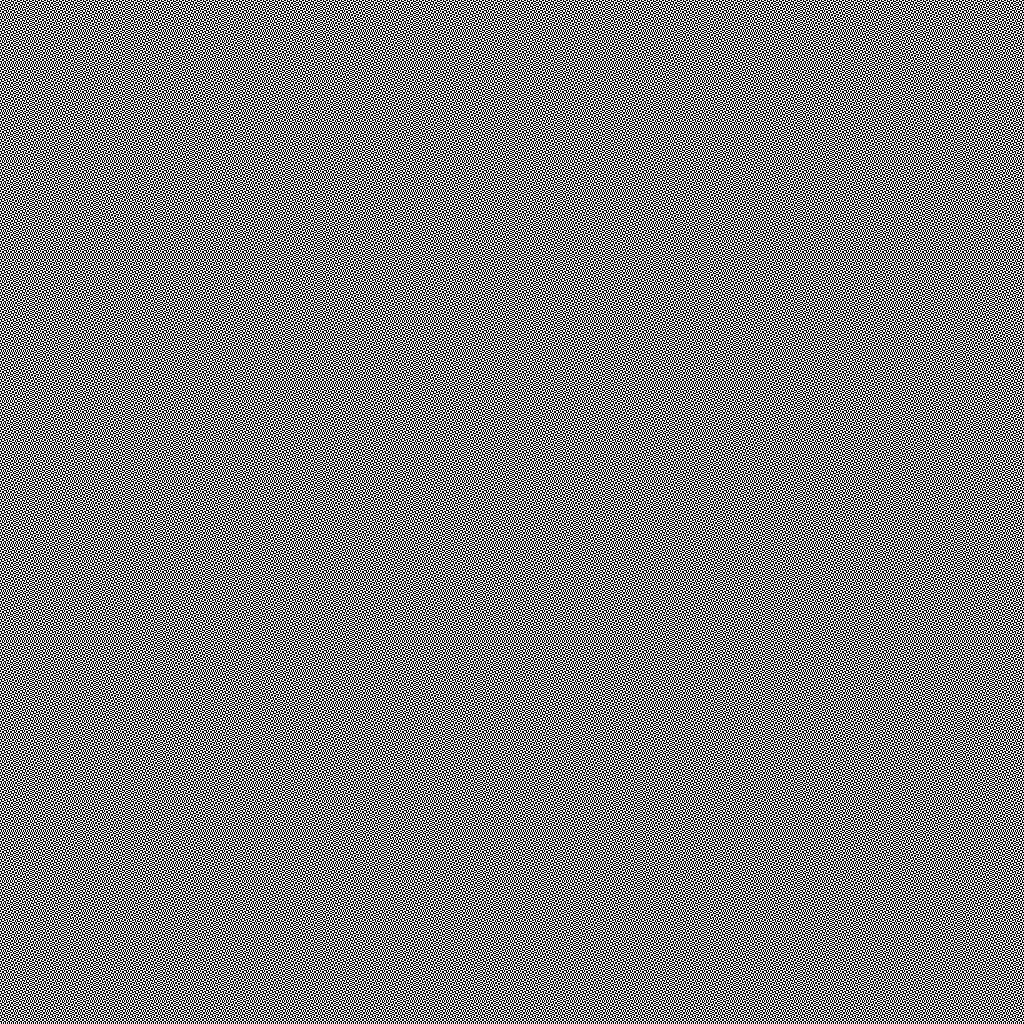

In [7]:
from hilbert import hilbert_indices, hilbert_binary_diagram

#The patter that will be put along the image
pattern = np.array([1, 1, -1, -1])

H = hilbert_indices(N)

#Fill hilbert curve with repeating pattern
hilbert_pattern = pattern[(H % len(pattern))]
hp_image = toimage(hilbert_pattern, gamma=1)
display(hp_image)

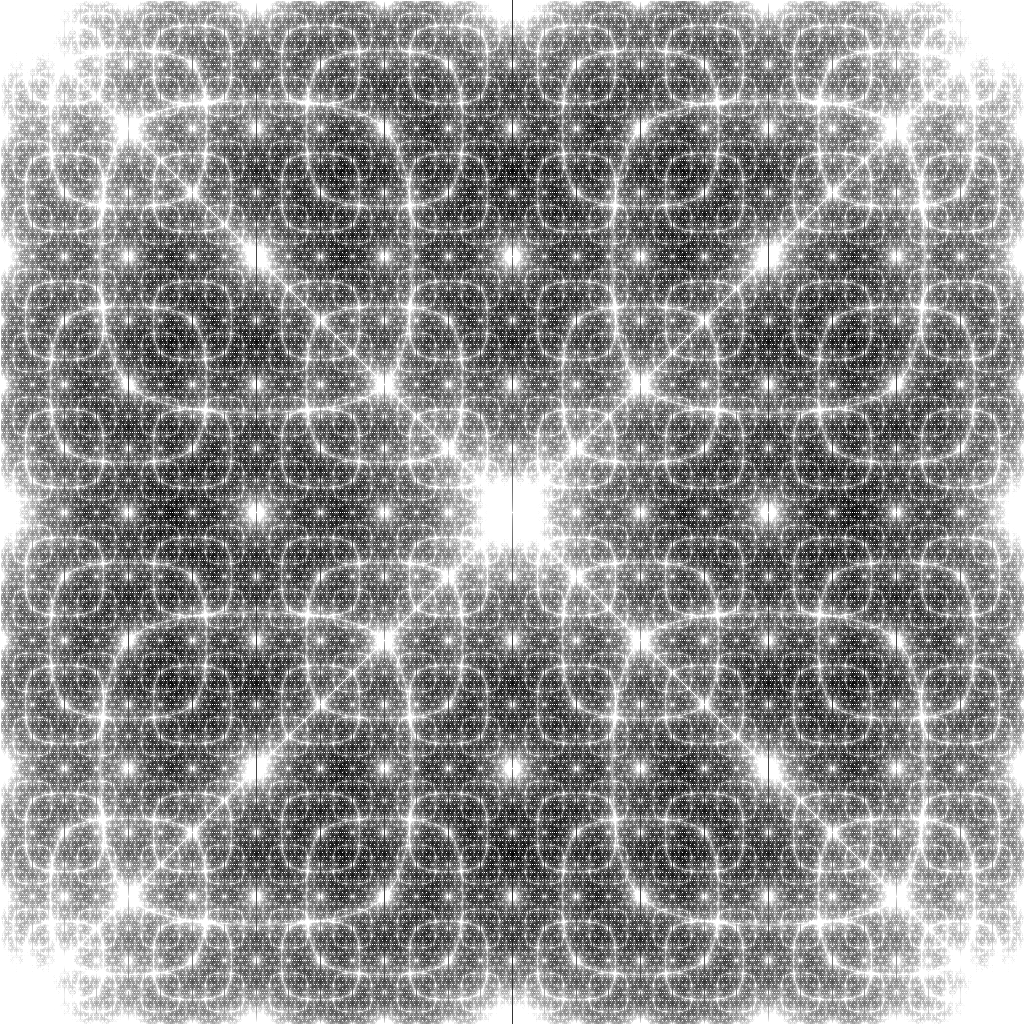

In [9]:
hp_fft_inverted = -np.log(np.abs(fft2(hilbert_pattern)) + 1e-100)
hp_fft_inverted_image = toimage(hp_fft_inverted, gamma=1, percent=0.7, extend = 1.5)
display(hp_fft_inverted_image)

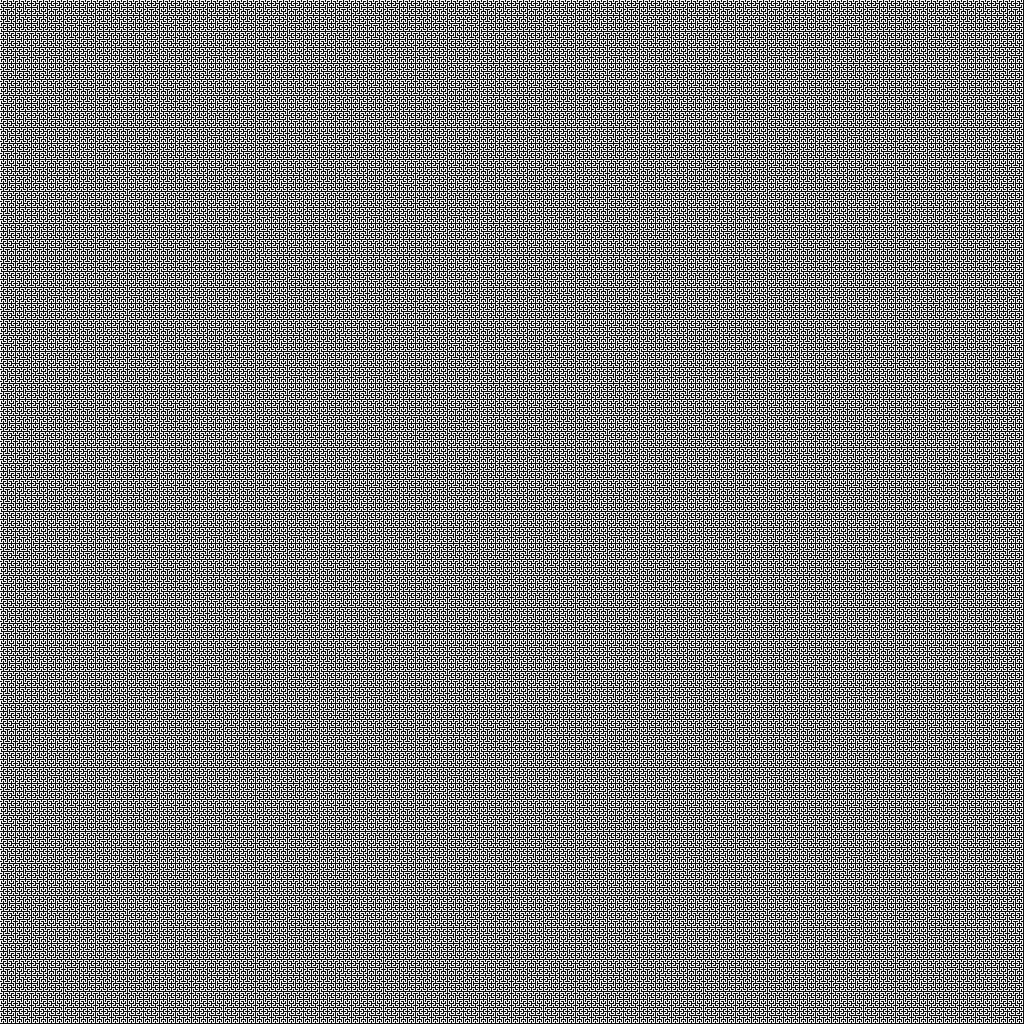

In [11]:
hilbert_curve = hilbert_binary_diagram(N)
hc_image = toimage(hilbert_curve, gamma=1)
display(hc_image)

In [ ]:
hc_fft_inverted = -np.log(np.abs(fft2(hilbert_curve))+1e-100)
hc_fft_inverted_image = toimage(hc_fft_inverted, gamma=1, percent=0.7, extend=1.5)
display(hc_fft_inverted_image)

# Dragon curve

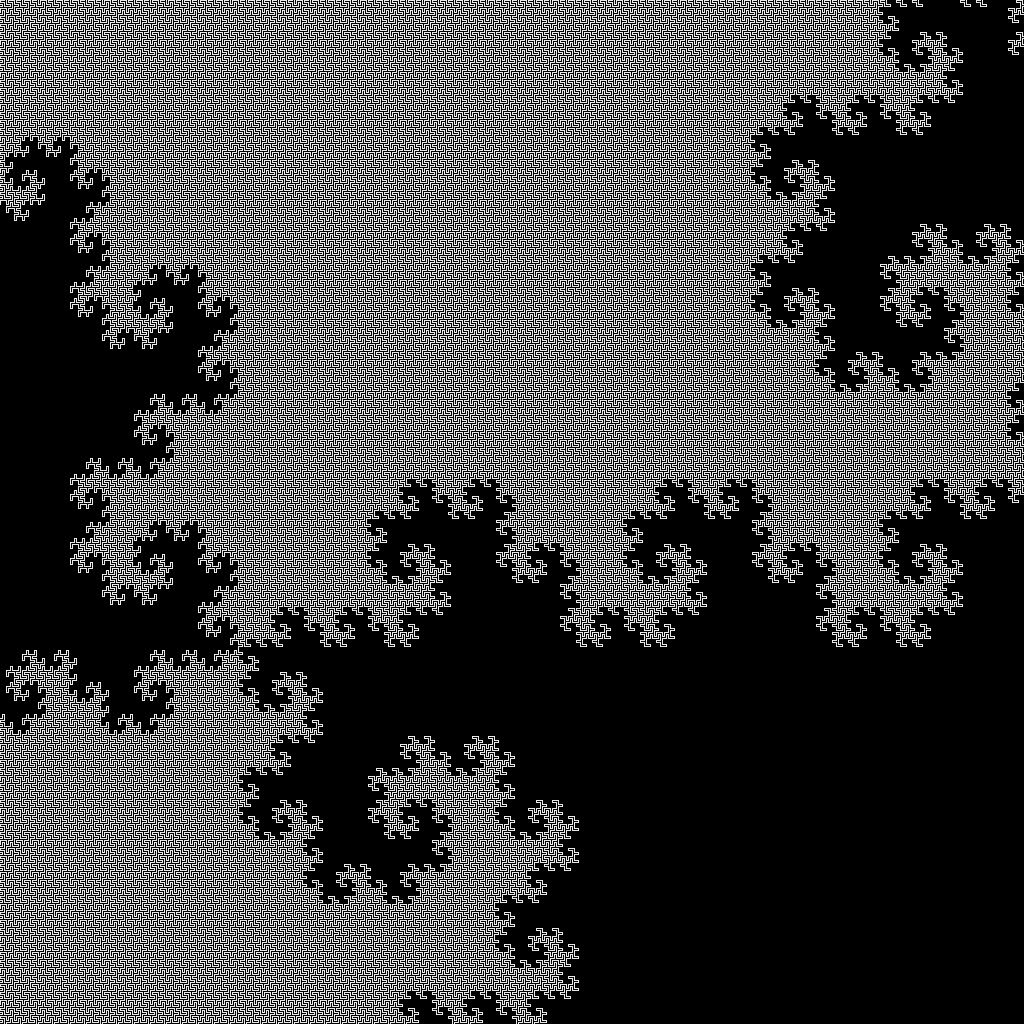

In [17]:
from dragon import dragon_binary_diagram

D = dragon_binary_diagram(N)
toimage(D)

In [ ]:
dragon_diagram = np.log(np.abs(fft2(D)) + 1e-100)
dragon_diagram_image = toimage(fftshift(dragon_diagram))
display(dragon_diagram_image)

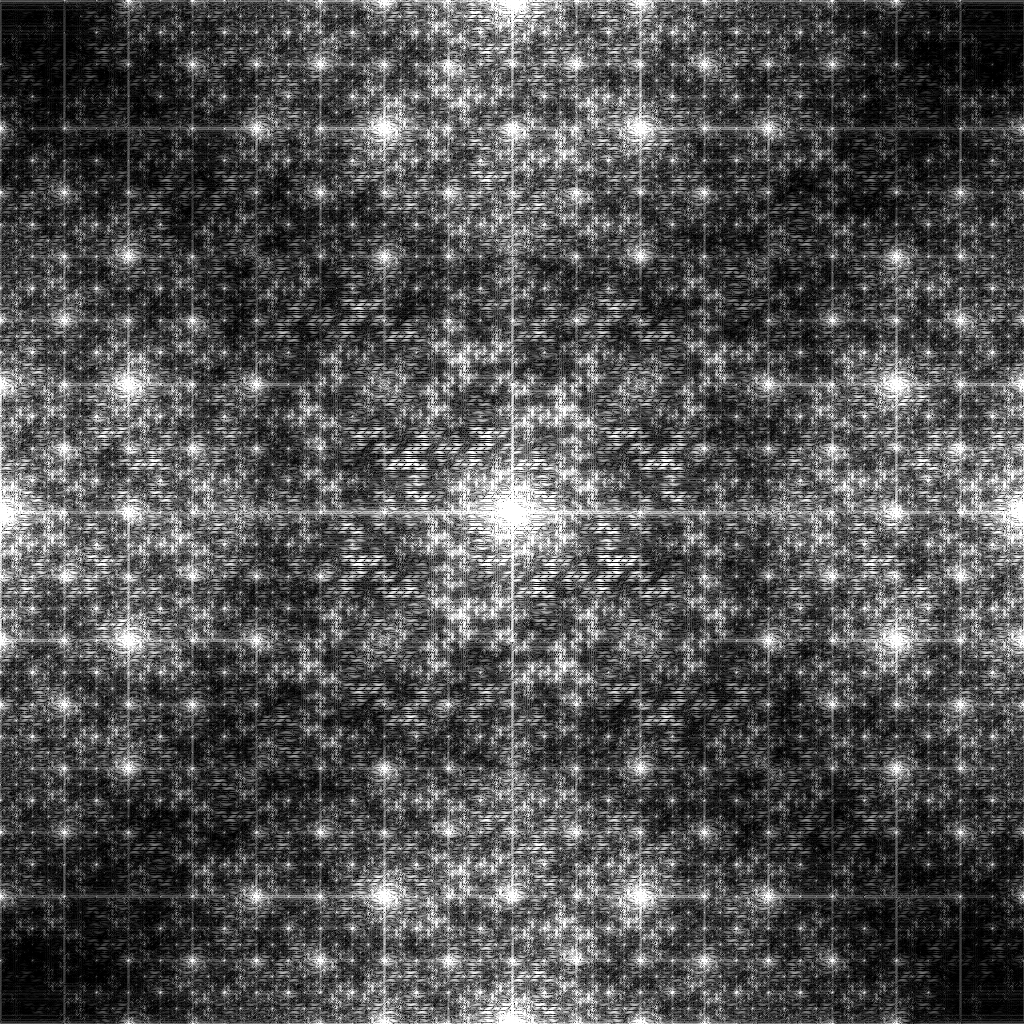

In [ ]:
dragon_diagram_fft = np.log(np.abs(fft2(D))+1e-100)
dragon_diagram_fft_image = toimage(fftshift(dragon_diagram_fft))
display(dragon_diagram_fft_image)

# Gosper curve

In [21]:
from gosper import gosper_diagram

size = 2**N
scale = 4

# calculate the order using the fact that
# curve increases by sqrt(7) times
order = int(log(size/scale)/log(sqrt(7)))

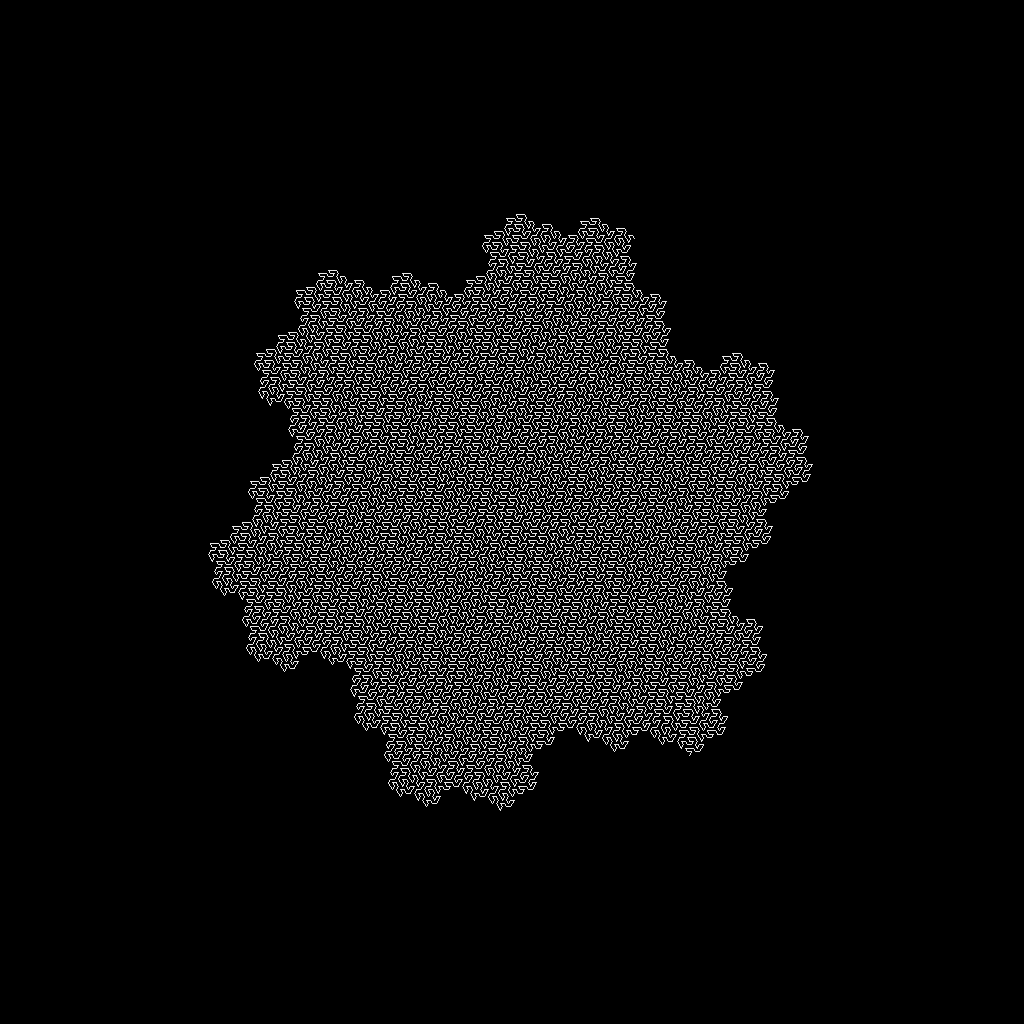

In [22]:
gosper_diagram = gosper_diagram( size, order, scale=scale )
toimage(gosper_diagram)

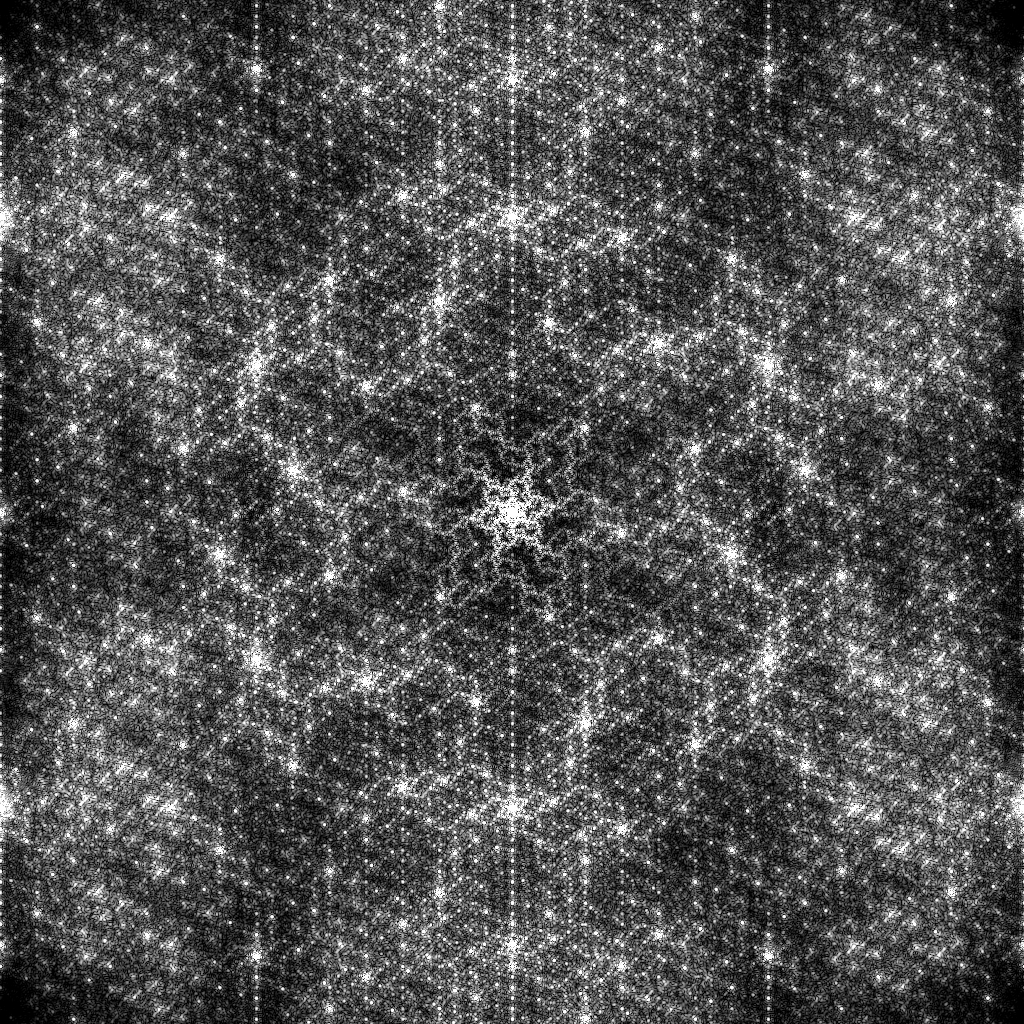

In [23]:
gosper_diagram_fft = np.log(np.abs(fft2(gosper_diagram))+1e-100)
toimage(fftshift(gosper_diagram_fft))